In [59]:
import math
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Union

In [100]:
def concrete_stretched(
    alpha: torch.Tensor,
    l: Union[float, int] = -1.5,
    r: Union[float, int] = 1.5,
    deterministic: bool = False
) -> torch.Tensor:
    if not deterministic:
        u = torch.zeros_like(alpha).uniform_().clamp_(0.0001, 0.9999)
        u_term = u.log() - (1-u).log()
        ua = u_term + alpha
    else:
        ua = alpha
    s = torch.sigmoid(ua)
    s_stretched = s*(r-l) + l
    z = s_stretched.clamp(0, 1000).clamp(-1000, 1)
    return z

In [101]:
l = torch.nn.Linear(100, 100)

In [102]:
x = l(torch.randn(4,100))

In [103]:
samples = []
for _ in range(3):
    out = concrete_stretched(x, l=-1.5, r=1.5, deterministic=False)
    samples.append(out)

In [112]:
(torch.stack(samples).mean(dim=0) == 0.).sum()

tensor(70)

In [114]:
(samples[0] == 0.).sum()

tensor(198)

In [116]:
torch.stack(samples)[:,0,0]

tensor([0.0000, 1.0000, 0.9986], grad_fn=<SelectBackward0>)

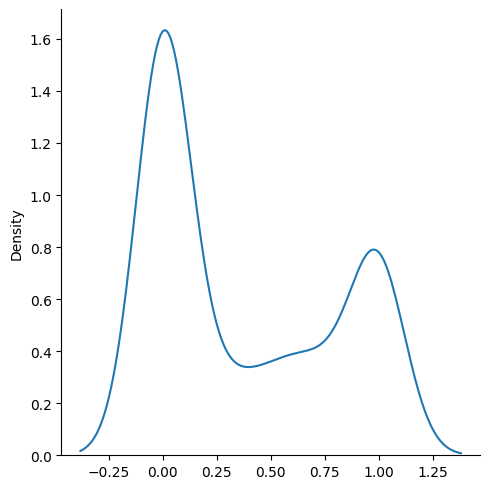

In [96]:
sns.displot(out.detach().numpy().flatten(), kind="kde", legend=False)

In [97]:
out = concrete_stretched(x, deterministic=True)

In [98]:
out

tensor([[0.2738, 0.1446, 0.0978, 0.5407, 0.0000, 0.6812, 0.7339, 0.0000, 0.0000,
         0.4119, 0.4025, 0.3990, 0.3490, 0.0000, 0.0000, 0.0654, 0.0000, 0.0070,
         0.2793, 0.0000, 0.5526, 0.0834, 0.0649, 0.0000, 0.2518, 0.0000, 0.0000,
         0.0545, 0.0000, 0.1545, 0.0696, 0.4070, 0.2511, 0.6896, 0.4405, 0.8078,
         0.0000, 0.0000, 0.0508, 0.0000, 0.0000, 0.1867, 0.8399, 0.0000, 0.3735,
         0.0423, 0.7567, 0.0000, 0.0000, 0.4015, 0.0000, 0.3852, 0.0000, 0.0000,
         0.0000, 0.0791, 0.4621, 0.0000, 0.0000, 0.0000, 0.5379, 0.0000, 0.0000,
         0.0381, 0.0255, 0.0820, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.2167, 0.0000, 0.5061, 0.7605, 0.2098, 0.7280, 0.0000,
         0.0000, 0.1295, 0.0000, 0.1767, 0.2063, 0.0000, 0.2252, 0.3012, 0.1575,
         0.6247, 0.0391, 0.0000, 0.3649, 0.5866, 0.5805, 0.7066, 0.0000, 0.2597,
         0.4631],
        [0.5104, 0.3258, 0.0155, 0.0000, 0.3439, 0.0030, 0.0000, 0.0000, 0.0000,
         0

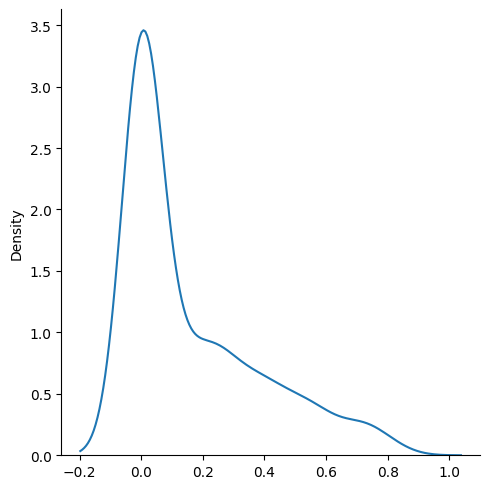

In [99]:
sns.displot(out.detach().numpy().flatten(), kind="kde", legend=False)

In [91]:
torch.exp(x)

tensor([[1.1234e+00, 3.4902e+00, 7.4015e+00, 4.1732e+00, 7.2099e-01, 2.2827e+00,
         3.2967e+00, 9.3302e-01, 1.5075e-01, 7.0237e-01, 3.6088e-02, 2.1976e+00,
         7.1225e-01, 8.4359e-02, 1.5340e-02, 9.5215e+00, 2.1061e+01, 5.7119e-01,
         2.2517e+00, 3.5974e+00, 1.3122e+00, 6.3081e-01, 4.0459e+00, 2.1987e+00,
         7.5247e+00, 2.3630e+00, 7.2319e-02, 3.2252e-02, 6.9433e+00, 1.5363e+00,
         7.1986e-01, 7.0717e+00, 5.1748e-01, 3.4004e+00, 6.2379e+01, 3.9013e-01,
         9.0281e+00, 1.5617e-01, 4.5510e+00, 4.1047e+00, 5.2161e-02, 2.9214e-01,
         1.1984e-01, 3.1864e-01, 1.7007e+01, 3.0470e+00, 6.3808e+00, 9.3073e+00,
         1.8085e-02, 1.1484e+01, 2.2579e+00, 1.3363e+00, 5.7413e+00, 3.3005e+00,
         4.2456e-01, 9.5699e-01, 1.8316e-01, 1.8858e-01, 1.3301e+00, 8.9227e-01,
         5.5771e-01, 3.4190e-01, 1.0971e+01, 6.3774e-01, 6.2875e-01, 9.6281e-02,
         9.0697e+00, 3.0003e+01, 3.5468e+01, 4.9701e+01, 1.0965e+00, 3.6234e+00,
         6.8046e+00, 2.6866e